In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
def bootstrap_std_dev(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.std()

def bootstrap_mean(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.mean()



c="all"
# df = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_good_policy")
# df_no_outliers = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_good_policy")
# df_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_bad_policy")
# df_no_outliers_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_bad_policy")

# df = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_good_policy")
# df_no_outliers = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_good_policy_no_outliers")
# df_bad = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_bad_policy")
# df_no_outliers_bad = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_bad_policy_no_outliers")


# df = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_good_coverage")
# df_no_outliers = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_good_coverage_no_outliers")
# df_bad = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_bad_coverage")
# df_no_outliers_bad = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_bad_coverage")
c='016'
suffix=''
folder="parquets/concept_experiments/regions"
df = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps02{suffix}")
df_no_outliers = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps02_no_outliers{suffix}")
df_bad = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps05{suffix}")
df_no_outliers_bad = pd.read_parquet(f"{folder}/ope_estimates_c{c}_eps05_no_outliers{suffix}")

#---BOOTSTRAP SAMPLING---
df_bootstrapped_std = pd.concat([bootstrap_std_dev(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_bad_bootstrapped_std = pd.concat([bootstrap_std_dev(df_bad) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bad_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers_bad) for i in range (1000)], axis=1).T.describe()

df_bootstrapped_mean = pd.concat([bootstrap_mean(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_mean= pd.concat([bootstrap_mean(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_bad_bootstrapped_mean = pd.concat([bootstrap_mean(df_bad) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bad_bootstrapped_mean = pd.concat([bootstrap_mean(df_no_outliers_bad) for i in range (1000)], axis=1).T.describe()

on_policy = -477 # -339 -227
on_policy_bad_coverage = -477 # -339 -227

df_stats = df.describe()
df_no_outliers_stats = df_no_outliers.describe()
df_stats_bad = df_bad.describe()
df_no_outliers_stats_bad = df_no_outliers_bad.describe()

print(df_stats)
print(df_no_outliers_stats)
# print(df_bootstrapped_std)
# print(df_bootstrapped_std.loc["std"].filter(like="vanilla"))

x = np.array([100, 300, 500, 700, 900])
# x = np.array([1000, 2000])


       100_vanilla  100_concepts  300_vanilla  300_concepts  500_vanilla  \
count   100.000000    100.000000   100.000000    100.000000   100.000000   
mean   -521.137501   -529.213218  -683.333323   -555.172458  -673.509505   
std     635.989280    673.127243   566.126679    428.639379   590.746272   
min   -6456.563712  -4493.177722 -3806.213095  -2884.096289 -4437.604276   
25%    -566.956459   -425.764074  -747.946901   -602.048366  -653.901285   
50%    -381.910157   -357.022364  -470.550196   -399.088498  -486.608940   
75%    -316.386555   -281.699056  -360.975923   -331.776462  -388.210846   
max    -186.568283   -153.636096  -283.025538   -247.058816  -292.077893   

       500_concepts  700_vanilla  700_concepts   900_vanilla  900_concepts  
count    100.000000   100.000000    100.000000    100.000000    100.000000  
mean    -690.367022  -725.119123   -552.469384   -753.098814   -570.220351  
std     1042.284224   580.978686    320.707789   1520.305441    332.141680  
min   -

In [35]:
colors_light = ["mediumturquoise", "orangered","limegreen", "palevioletred", "violet",  "orangered", "plum","lightsteelblue", "greenyellow", "violet"]
colors_dark = ["dodgerblue" , "gold", "forestgreen", "red", "darkviolet", "gold", "blueviolet" , "darkslategrey", "olive", "darkviolet"]

concepts_color = colors_light[8] #"limegreen" mediumturquoise orangered violet palevioletred
concepts_color_bad = colors_dark[8] #"forestgreen" dodgerblue gold darkviolet red
vanilla_color = "lightsalmon"
vanilla_color_bad = "saddlebrown"

pdis_label=r'IS $\epsilon$=0.2'
cpdis_label=r'CIS $\epsilon$=0.2'
pdis_label_2=r'IS $\epsilon$=0.5'
cpdis_label_2=r'CIS $\epsilon$=0.5'

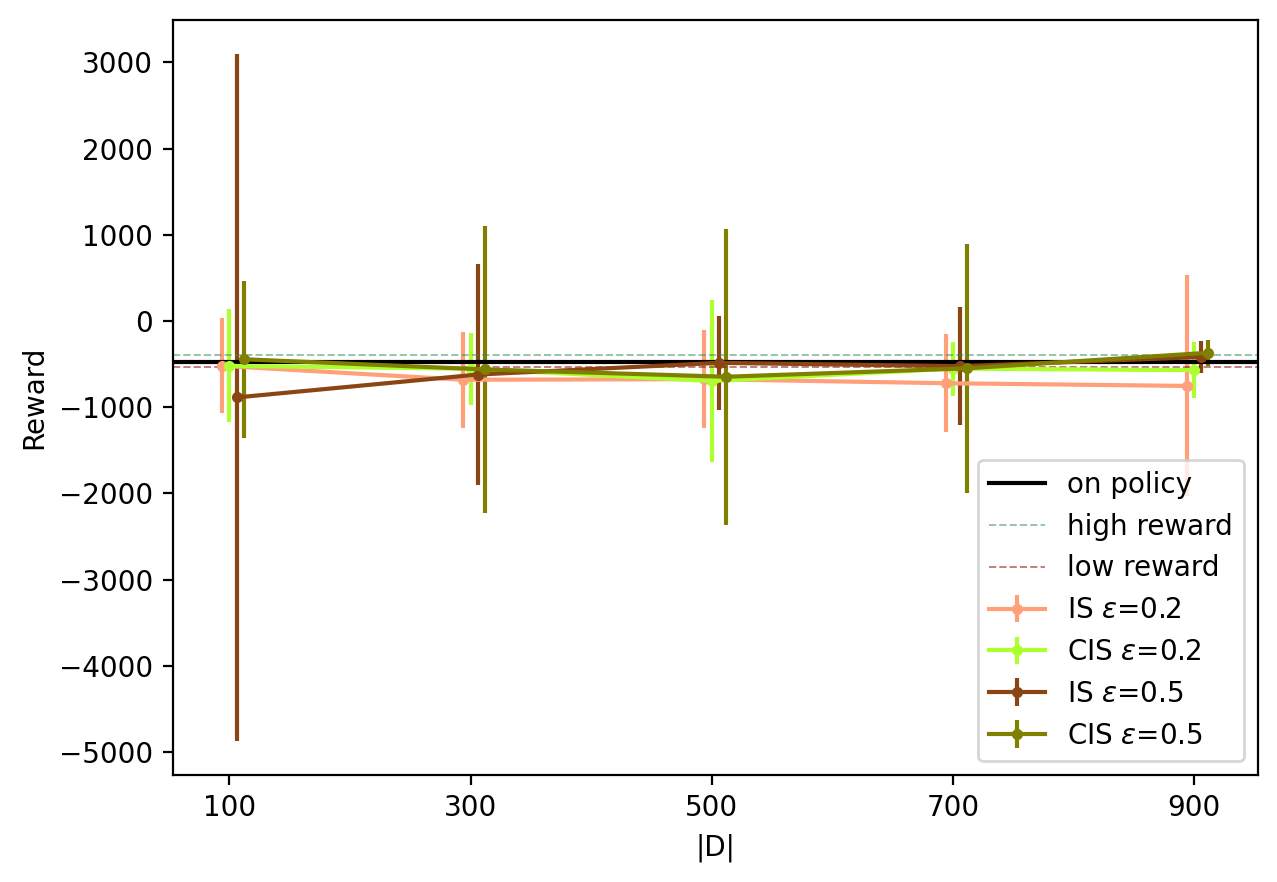

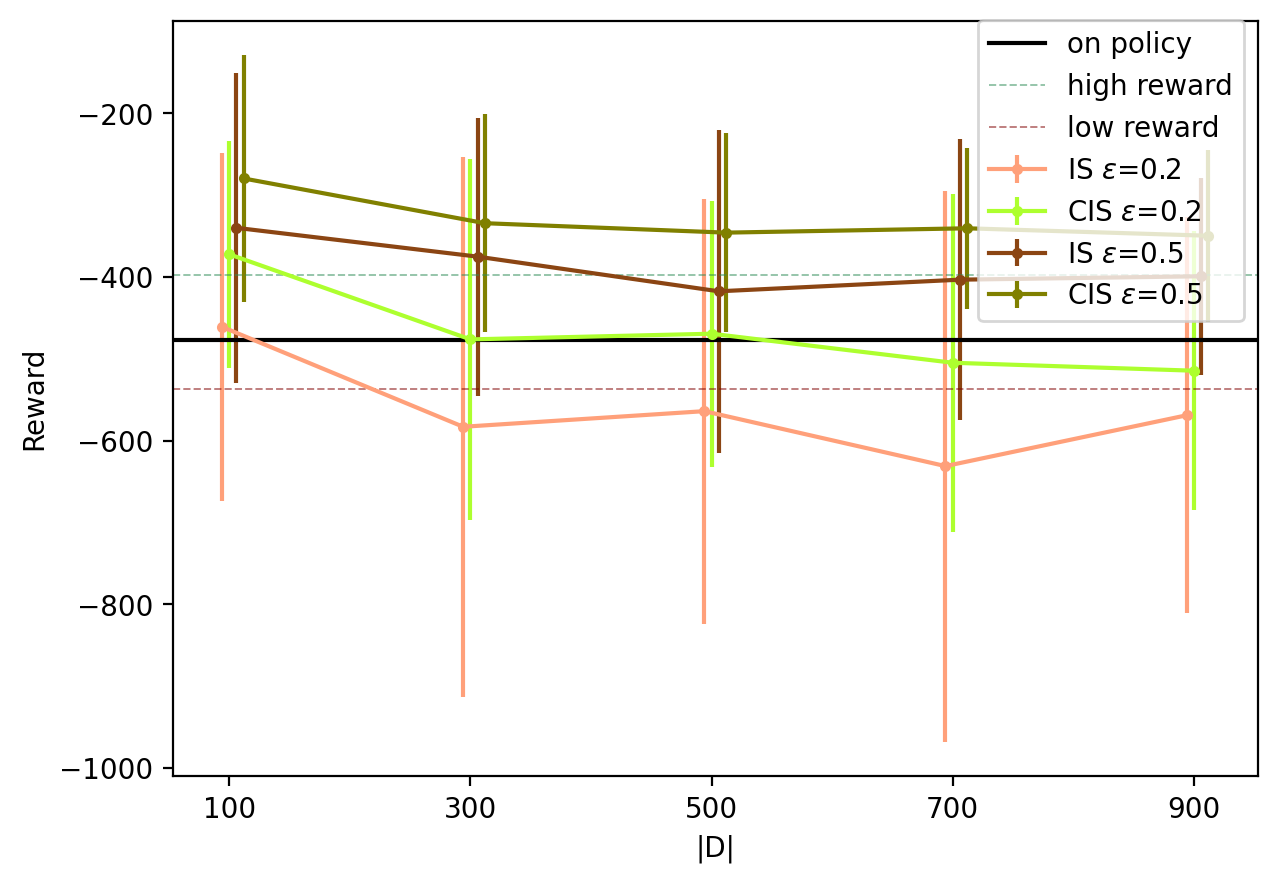

In [36]:
mean_estimates_vanilla = df_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts = df_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla = df_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts = df_bootstrapped_std.loc["mean"].filter(like="concepts")


mean_estimates_vanilla_bad = df_bad_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_bad = df_bad_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_bad = df_bad_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_bad = df_bad_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["mean"].filter(like="concepts")


a_high_reward = -397
a_low_reward = -537


fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)

plt.errorbar(x-6, mean_estimates_vanilla.to_list() , yerr=std_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts.to_list() , yerr=std_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mean_estimates_vanilla_bad.to_list() , yerr=std_vanilla_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, mean_estimates_concepts_bad.to_list() , yerr=std_concepts_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.axhline(on_policy, label="on policy", color="black")
plt.axhline(a_high_reward, label="high reward", color="seagreen", alpha=0.5, linestyle="--", linewidth=0.7)
plt.axhline(a_low_reward, label="low reward", color="maroon", alpha=0.5, linestyle="--", linewidth=0.7)
plt.legend(loc="lower right")
plt.ylabel("Reward")
plt.xlabel("|D|")
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x-6, mean_estimates_vanilla_no_outliers.to_list() , yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts_no_outliers.to_list() , yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, mean_estimates_vanilla_no_outliers_bad.to_list() , yerr=std_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, mean_estimates_concepts_no_outliers_bad.to_list() , yerr=std_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.axhline(on_policy, label="on policy", color="black")
plt.axhline(a_high_reward, label="high reward", color="seagreen", alpha=0.5, linestyle="--", linewidth=0.7)
plt.axhline(a_low_reward, label="low reward", color="maroon", alpha=0.5, linestyle="--", linewidth=0.7)
plt.xlabel("|D|")
plt.xticks(x)


plt.ylabel("Reward")
plt.legend(loc="upper right",bbox_to_anchor=(1, 1.02))
plt.show()

## Bias Plots

100_concepts    -44.270540
300_concepts    -78.065580
500_concepts   -219.997318
700_concepts    -76.369454
900_concepts    -93.770205
Name: mean, dtype: float64


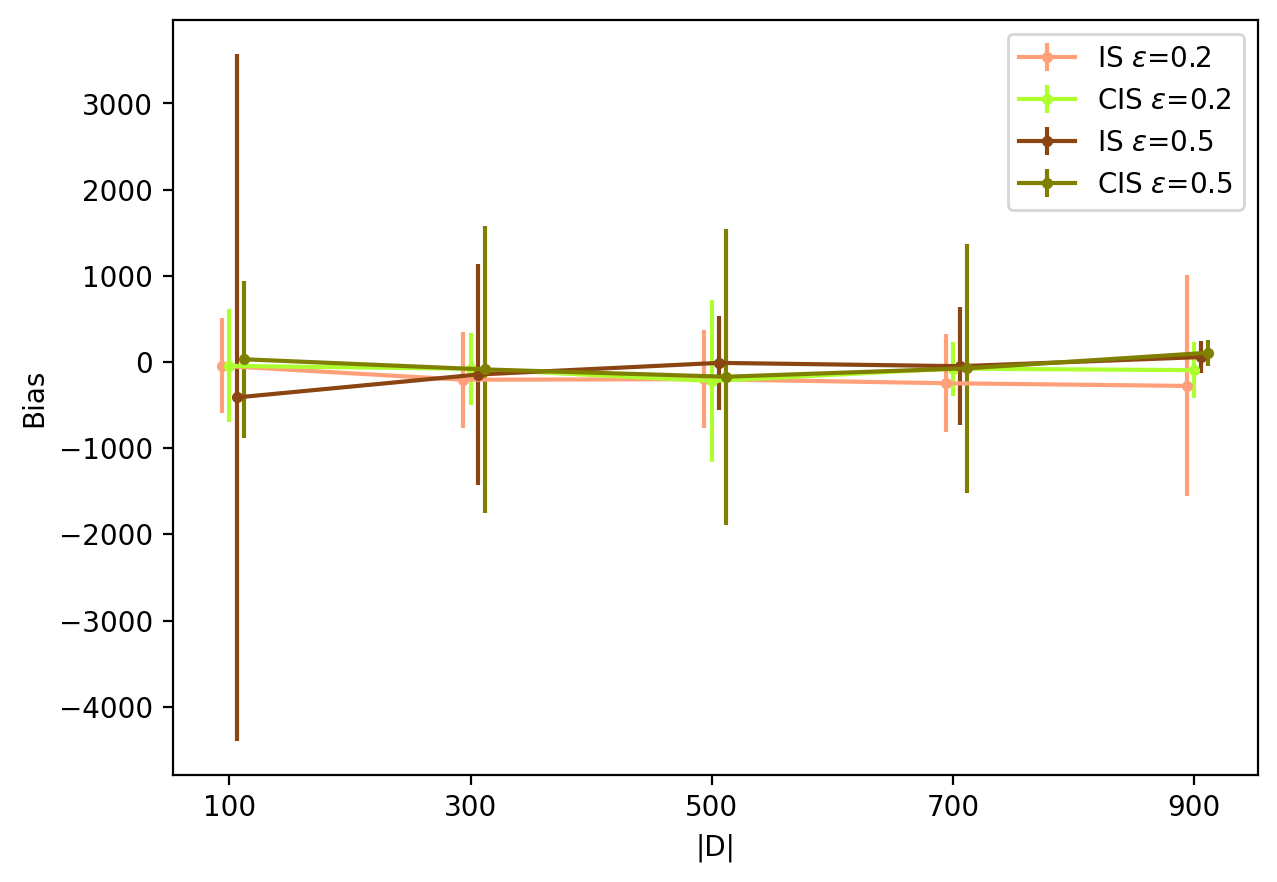

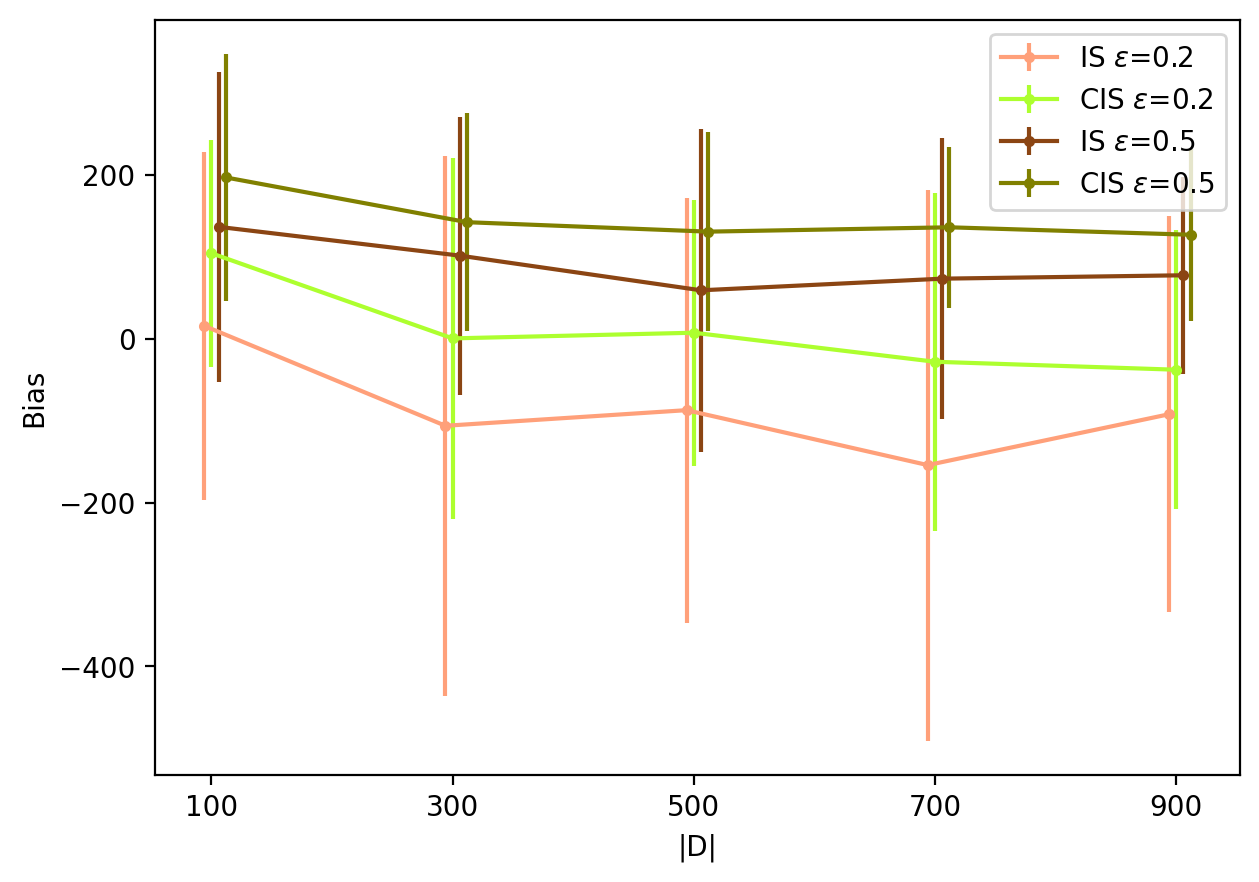

In [37]:

bias_vanilla = mean_estimates_vanilla - on_policy
bias_concepts = mean_estimates_concepts - on_policy
bias_vanilla_no_outliers = mean_estimates_vanilla_no_outliers - on_policy
bias_concepts_no_outliers = mean_estimates_concepts_no_outliers - on_policy

bias_vanilla_bad = mean_estimates_vanilla_bad - on_policy
bias_concepts_bad = mean_estimates_concepts_bad - on_policy
bias_vanilla_no_outliers_bad = mean_estimates_vanilla_no_outliers_bad - on_policy
bias_concepts_no_outliers_bad = mean_estimates_concepts_no_outliers_bad - on_policy



fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)
plt.errorbar(x-6, bias_vanilla, label=pdis_label, yerr=std_vanilla.to_list(), color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts, label=cpdis_label, yerr=std_concepts.to_list(), color=concepts_color, marker=".")
plt.errorbar(x+6, bias_vanilla_bad, label=pdis_label_2, yerr=std_vanilla_bad.to_list(), color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, bias_concepts_bad, label=cpdis_label_2, yerr=std_concepts_bad.to_list(), color=concepts_color_bad, marker=".")
plt.xlabel("|D|")
plt.ylabel("Bias") 
plt.xticks(x)
plt.legend()
print(bias_concepts)
fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x-6, bias_vanilla_no_outliers, yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts_no_outliers, yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, bias_vanilla_no_outliers_bad, yerr=std_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, bias_concepts_no_outliers_bad, yerr=std_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.ylabel("Bias")
plt.xlabel("|D|")
plt.xticks(x)

plt.legend(loc="upper right")
plt.show()


## Variance Plots

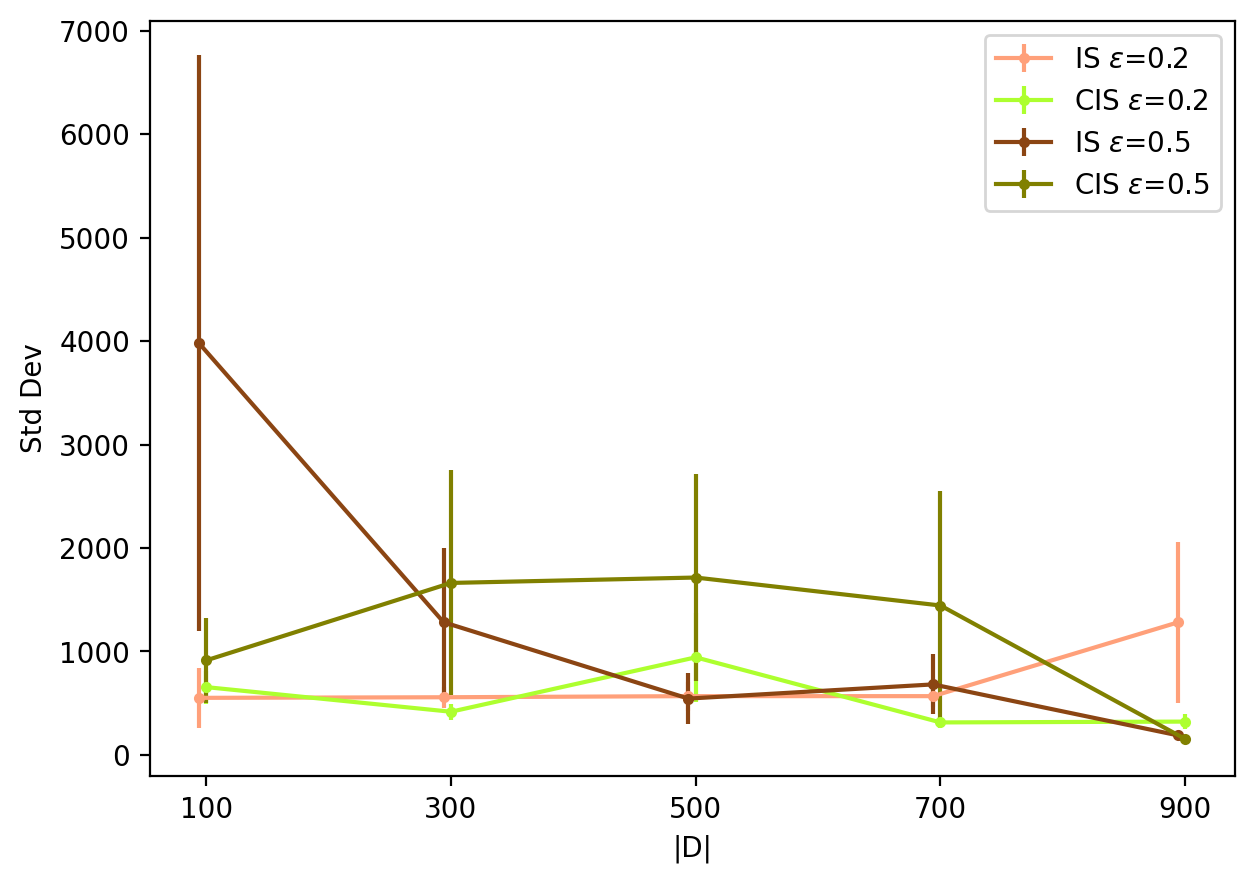

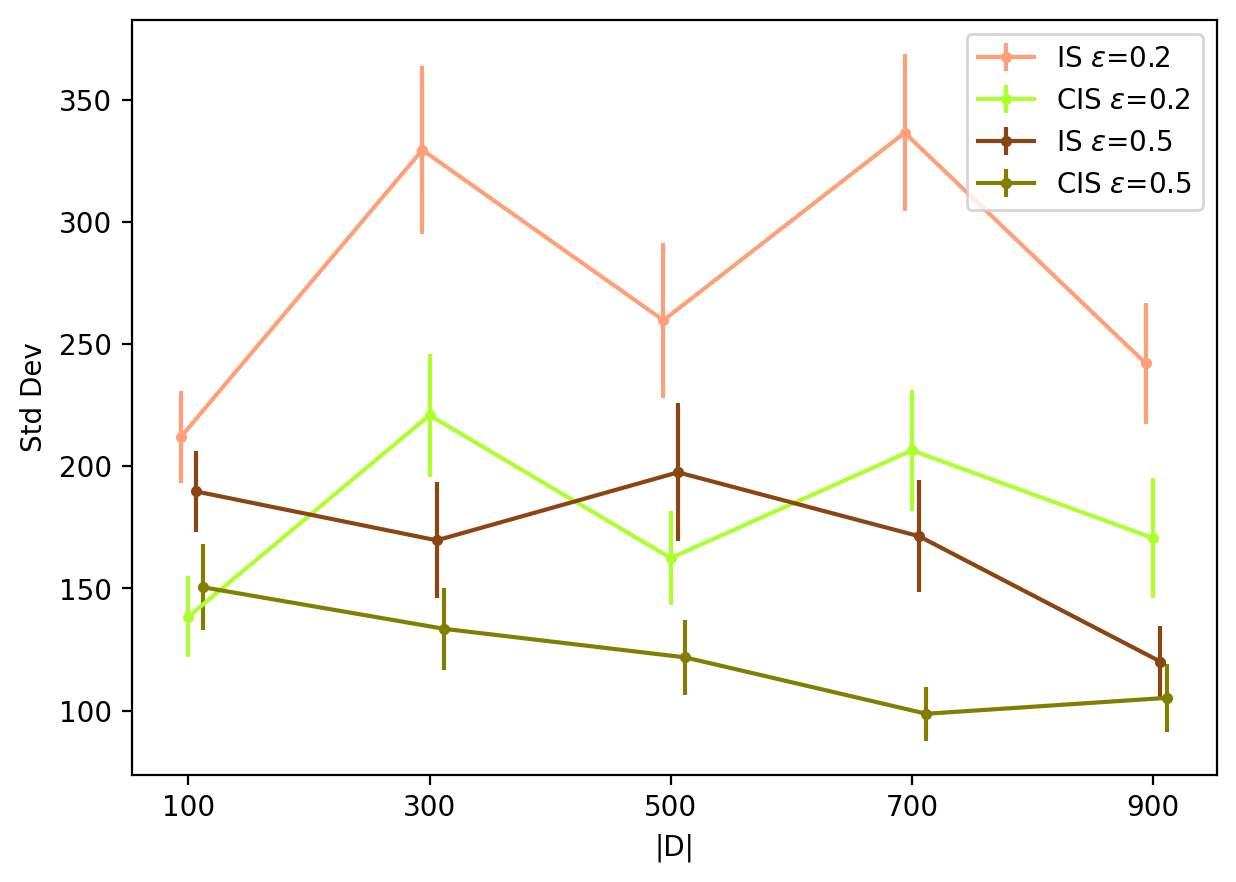

In [38]:
var_vanilla = std_vanilla**2
var_concepts = std_concepts**2
var_vanilla_no_outliers = std_vanilla_no_outliers**2
var_concepts_no_outliers = std_concepts_no_outliers**2
var_vanilla_bad = std_vanilla_bad**2
var_concepts_bad = std_concepts_bad**2
var_vanilla_no_outliers_bad = std_vanilla_no_outliers_bad**2
var_concepts_no_outliers_bad = std_concepts_no_outliers_bad**2

#Error bars of standard deviation from bootstrap sampling
err_vanilla = df_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts = df_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_bad = df_bad_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_bad = df_bad_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["std"].filter(like="concepts")


fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)

plt.errorbar(x-6, std_vanilla, yerr=err_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts, yerr=err_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x-6, std_vanilla_bad, yerr=err_vanilla_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad,  marker=".")
plt.errorbar(x, std_concepts_bad, yerr=err_concepts_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.legend()
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x-6, std_vanilla_no_outliers, yerr=err_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts_no_outliers, yerr=err_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, std_vanilla_no_outliers_bad, yerr=err_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad,  marker=".")
plt.errorbar(x+12, std_concepts_no_outliers_bad, yerr=err_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.xticks(x)


plt.legend(loc="upper right")
plt.show()


## MSE Plots

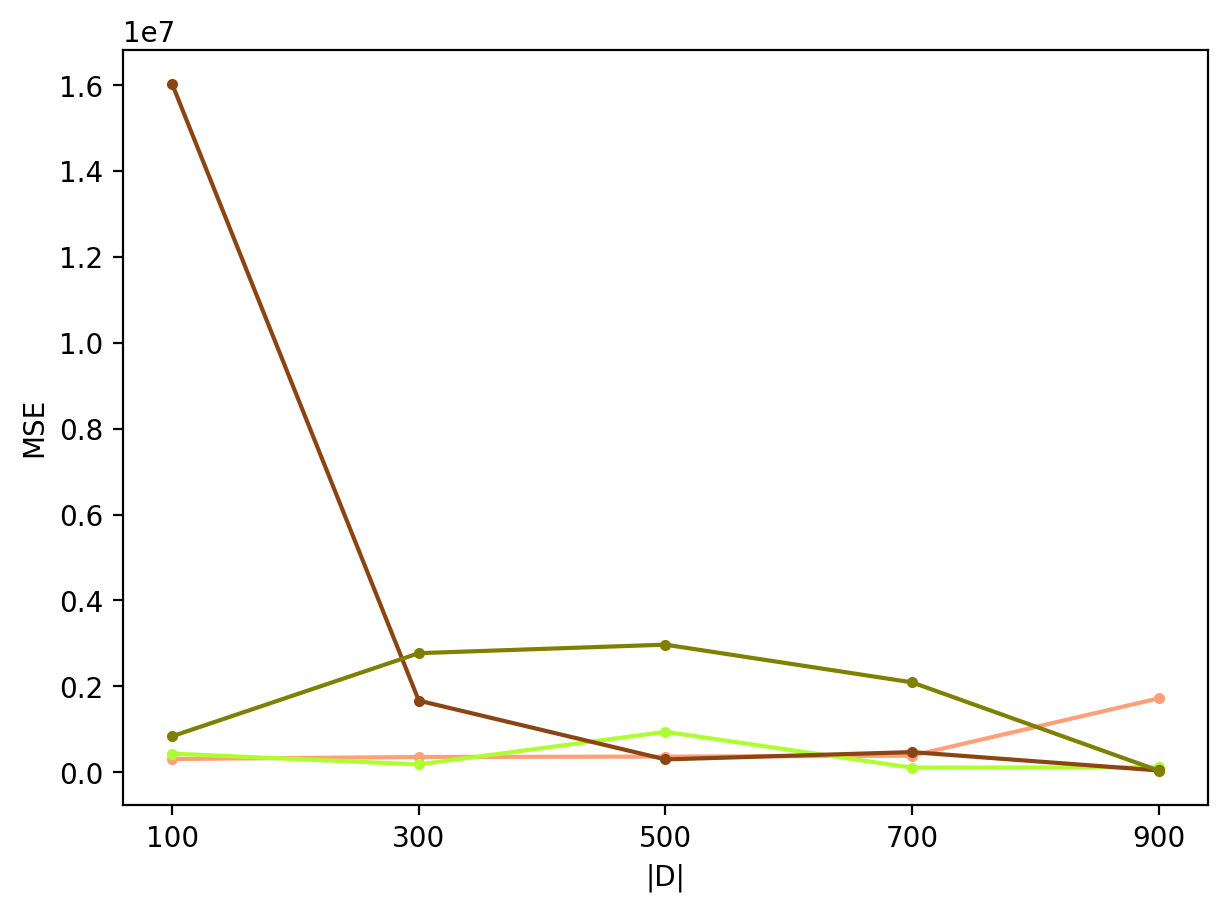

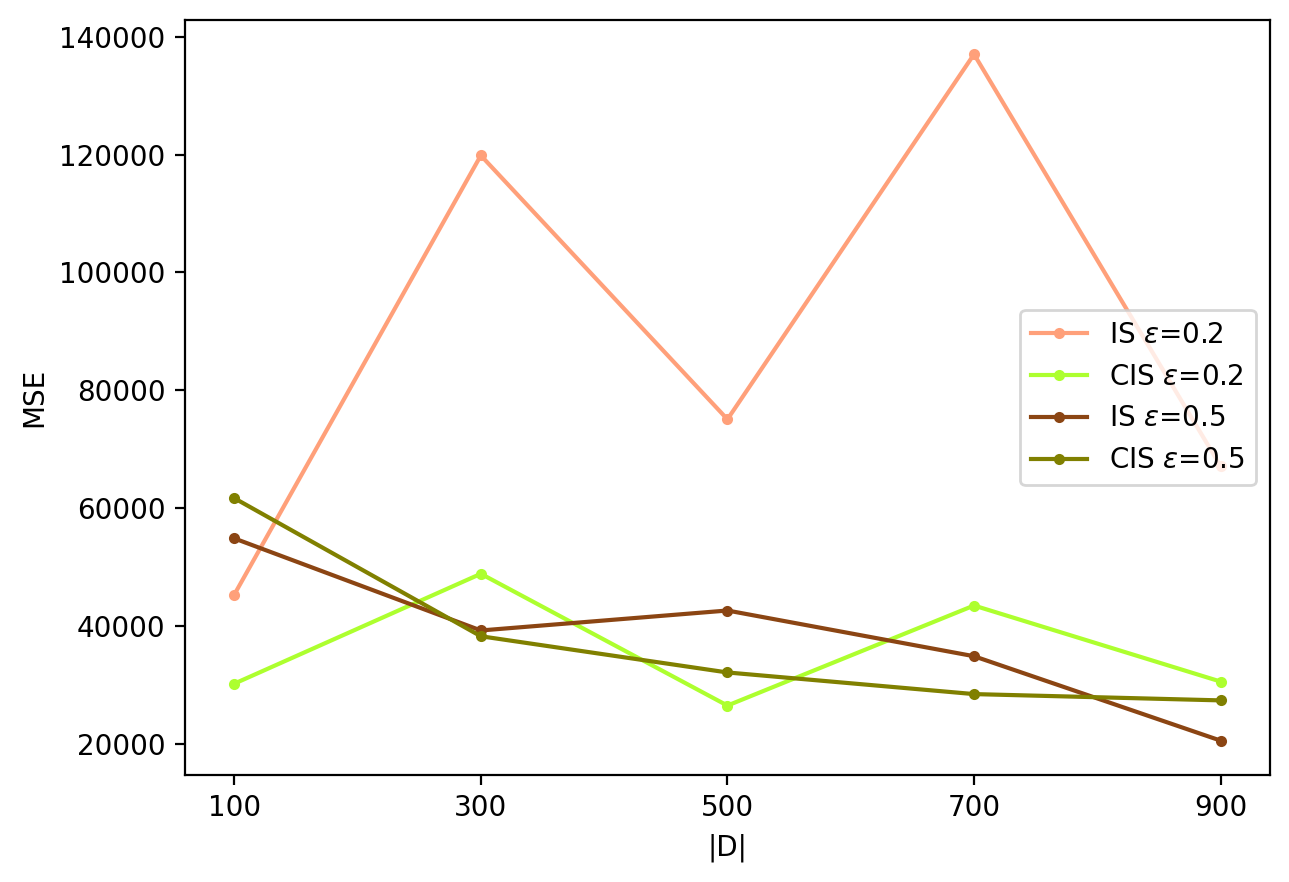

In [39]:
mse_vanilla = var_vanilla + bias_vanilla**2
mse_concepts = var_concepts + bias_concepts**2
mse_vanilla_no_outliers = var_vanilla_no_outliers + bias_vanilla_no_outliers**2
mse_concepts_no_outliers = var_concepts_no_outliers + bias_concepts_no_outliers**2

mse_vanilla_bad = var_vanilla_bad + bias_vanilla_bad**2
mse_concepts_bad = var_concepts_bad + bias_concepts_bad**2
mse_vanilla_no_outliers_bad = var_vanilla_no_outliers_bad + bias_vanilla_no_outliers_bad**2
mse_concepts_no_outliers_bad = var_concepts_no_outliers_bad + bias_concepts_no_outliers_bad**2

fig = plt.figure(figsize=(7,5), dpi=200)

plt.plot(x, mse_vanilla, label=pdis_label, color=vanilla_color, marker=".")
plt.plot(x, mse_concepts, label=cpdis_label, color=concepts_color, marker=".")
plt.plot(x, mse_vanilla_bad, label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.plot(x, mse_concepts_bad, label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.xlabel("|D|")
plt.ylabel("MSE")
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
plt.plot(x, mse_vanilla_no_outliers, label=pdis_label, color=vanilla_color, marker=".")
plt.plot(x, mse_concepts_no_outliers, label=cpdis_label, color=concepts_color, marker=".")
plt.plot(x, mse_vanilla_no_outliers_bad, label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.plot(x, mse_concepts_no_outliers_bad, label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.xlabel("|D|")
plt.ylabel("MSE")
plt.xticks(x)


plt.legend(loc="center right")
plt.show()